In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
import pandas as pd
import numpy as np
import yfinance as yf
#from datetime import datetime, timedelta
import datetime
data = yf.download(  # or pdr.get_data_yahoo(...
        tickers = "VIXY SPXL",
        period = "ytd",
        interval = "1d",
        group_by = 'ticker',
        auto_adjust = True,
        prepost = True,
        threads = True,
        proxy = None
    )


[*********************100%***********************]  2 of 2 completed


In [9]:
vixy = data['VIXY'][['Close']]

In [10]:
spxl = data['SPXL'][['Close']]

<AxesSubplot:xlabel='dates'>

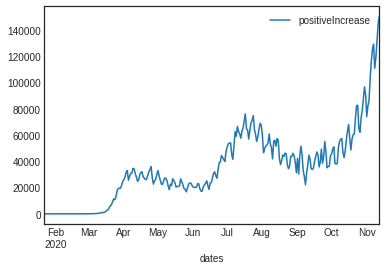

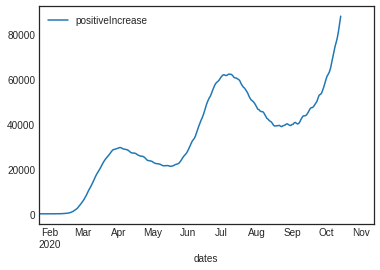

In [9]:
import requests
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
import pandas as pd
import numpy as np
c = pd.json_normalize(requests.get('https://api.covidtracking.com/v1/us/daily.json').json())
b=c[['date','positiveIncrease']]
k = pd.to_datetime(b['date'], format='%Y%m%d')
b.insert(2,'dates',k,True)
d = b.set_index('dates')
d = d[['positiveIncrease']]
#vixy.plot()
#spxl.plot()
d.plot()
d.rolling(30).mean().plot()

<AxesSubplot:xlabel='dates'>

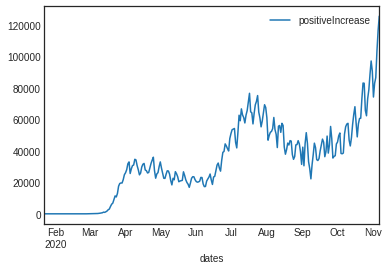

In [7]:
#vixy.plot()
#spxl.plot()
d.plot()

In [43]:
q = d

In [59]:
q = d
w = q.join(vixy)

In [73]:
w= w.rename(columns={'Close':'vixy_close'})
w=w.join(spxl)

In [74]:
w=w.rename(columns={'Close':'spxl_close'})

In [75]:
w

,positiveIncrease,vixy_close,spxl_close
dates,,,
2020-10-31,90058,NaN,NaN
2020-10-30,97080,21.730000,48.139999
2020-10-29,88452,20.799999,49.720001
2020-10-28,78661,22.709999,48.310001
2020-10-27,73096,19.850000,53.799999
...,...,...,...
2020-01-26,0,NaN,NaN
2020-01-25,0,NaN,NaN
2020-01-24,0,11.710000,69.974960


<AxesSubplot:xlabel='dates'>

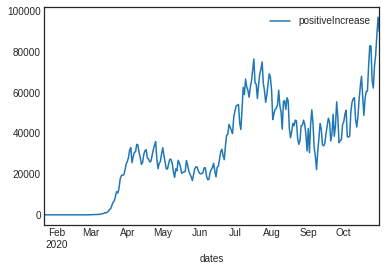

In [78]:
q.plot()

In [79]:
c

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,totalTestResults,lastModified,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20201031,56,9077689,120097654,10635.0,47374.0,475025.0,9495.0,24375.0,2502.0,...,146150525,2020-10-31T00:00:00Z,0,0,960,2025,1036006,90058,1356298,5c2fd5173ef6c25830575fb9cd1234e587b5d30d
1,20201030,56,8987631,119061648,11120.0,46688.0,473000.0,9437.0,24230.0,2477.0,...,144794227,2020-10-30T00:00:00Z,0,0,933,2421,980084,97080,1362376,24ff12b2c27f353bac3cdb9689c720229dda06e4
2,20201029,56,8890551,118081564,10481.0,46095.0,470579.0,9208.0,24082.0,2403.0,...,143431851,2020-10-29T00:00:00Z,0,0,1049,2292,1008042,88452,1325104,9c17a8b5170446d479e97ac9555e1c6ccd234219
3,20201028,56,8802099,117073522,9600.0,45045.0,468287.0,9034.0,23883.0,2347.0,...,142106747,2020-10-28T00:00:00Z,0,0,1025,2510,797077,78661,1085647,637c7fbc763044f84b0f34a2dd5fe55adc130db5
4,20201027,56,8723438,116276445,8129.0,44212.0,465777.0,8909.0,23701.0,2287.0,...,141021100,2020-10-27T00:00:00Z,0,0,931,2248,818919,73096,1080760,12725e3254c7e09510bc763ede90a0e9154e934b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,20200126,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2020-01-26T00:00:00Z,0,0,0,0,0,0,0,88a196879207bd090a61fb515beb301e84377977
280,20200125,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2020-01-25T00:00:00Z,0,0,0,0,0,0,0,43330e2f11d476ebcdd85e1a47551958e4c1e7ea
281,20200124,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2020-01-24T00:00:00Z,0,0,0,0,0,0,0,5f7a0cce04041596513629d55777a16f3aa65e8b
282,20200123,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2020-01-23T00:00:00Z,0,0,0,0,0,0,1,53f6a5e3985cebdead7ca275b0890ef975f0ccdd
